In [3]:
!pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1

     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     -

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)

In [1]:
def warn(*arg,**kwargs):
    pass
import warnings
warnings.warn=warn

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [30]:
def get_R2_features(model, test=True):
    
    features=list(X)
    features.remove("three")

    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],Y_train)

        R_2_test.append(model.score(X_test[[feature]],Y_test))
        R_2_train.append(model.score(X_train[[feature]],Y_train))
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [4]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [5]:
data = pd.read_csv('encoded_car_data.csv')
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

In [7]:
data.shape

(205, 36)

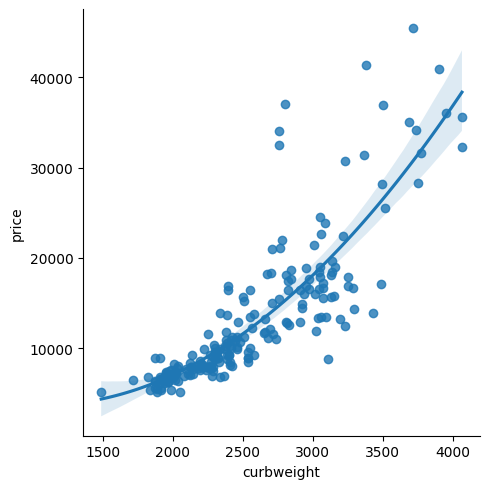

In [8]:
sns.lmplot(x = 'curbweight', y = 'price', data = data, order=2)

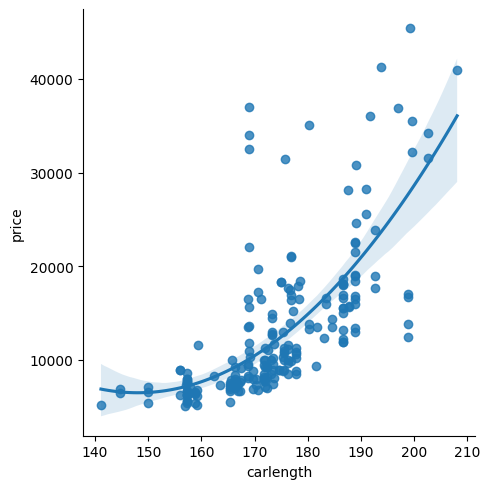

In [9]:
sns.lmplot(x = 'carlength', y = 'price', data = data, order=2)

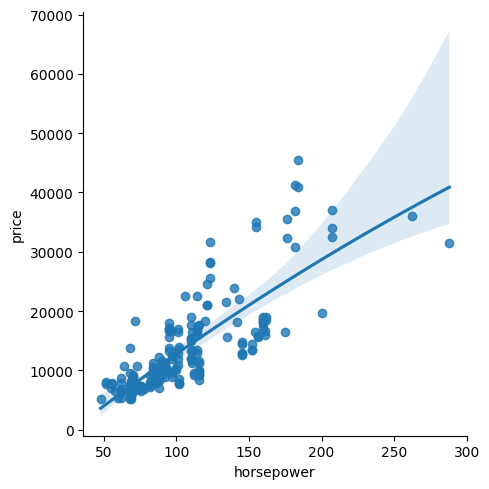

In [10]:
sns.lmplot(x='horsepower',y='price',data=data,order=2)

In [11]:
X=data.drop('price',axis=1)
Y=data.price

In [12]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)
print("Number of test samples :",X_test.shape[0])
print("Number of train samples : " , Y_train.shape[0])

Number of test samples : 62
Number of train samples :  143


In [13]:
LR=LinearRegression()

In [14]:
LR.fit(X_train,Y_train)

LinearRegression()

In [15]:
predicted=LR.predict(X_test)

In [16]:
print("R^2 on training  data ",LR.score(X_train, Y_train))
print("R^2 on testing data ",LR.score(X_test,Y_test))

R^2 on training  data  0.9261981895971949
R^2 on testing data  0.8500551011878996


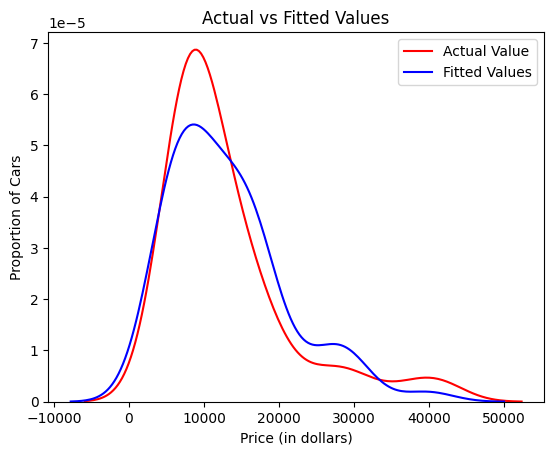

In [18]:
plot_dis(Y_test,predicted)

In [20]:
{col:coef for col,coef in zip(X.columns,LR.coef_)}

{'diesel': -1348733091931160.2,
 'gas': -1348733091932830.8,
 'std': 328.09636017791996,
 'turbo': -379.0415743673835,
 'convertible': 1754.235437293915,
 'hardtop': 3038.425405937796,
 'hatchback': -1726.915116536612,
 'sedan': -655.3274707371338,
 'wagon': -2409.074307082546,
 '4wd': -632.1716184519332,
 'fwd': -321.51861763260297,
 'rwd': 954.3270108498389,
 'dohc': 2460.105523267882,
 'dohcv': -13356.354667660296,
 'l': 2135.3973376499416,
 'ohc': 4619.6241388433,
 'ohcf': 6075.189965805647,
 'ohcv': -2664.358428925572,
 'rotor': 729.6254714929158,
 'eight': 9205.568023694754,
 'five': -2679.9390212080825,
 'four': -5283.668295516305,
 'six': -2115.911567126084,
 'three': 0.0029296875,
 'twelve': 144.64806138435134,
 'two': 729.6342605554158,
 'wheelbase': 99.61247779746205,
 'curbweight': 4.789142482173508,
 'enginesize': 23.503149010125764,
 'boreratio': -1809.3275275247115,
 'horsepower': 68.62591613088244,
 'carlength': -63.72227335557646,
 'carwidth': 577.0394096646708,
 'city

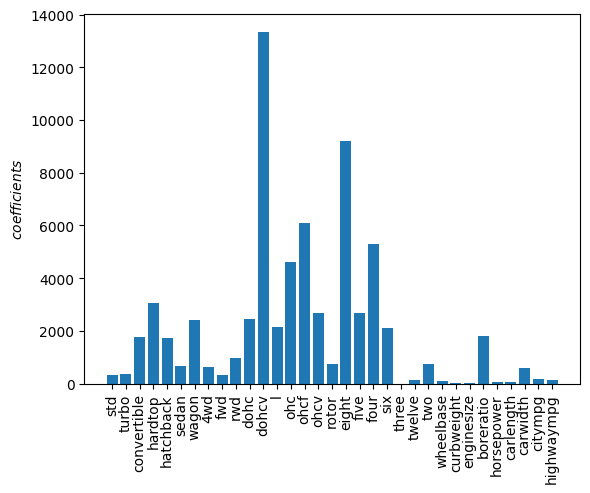

In [23]:
plt.bar(X.columns[2:],abs(LR.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.show()

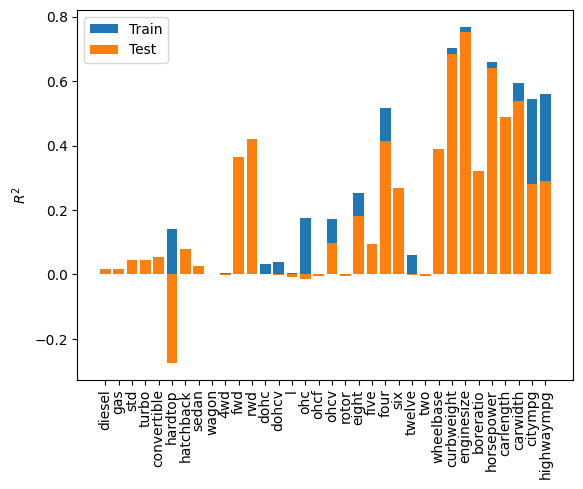

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506853 


In [31]:
get_R2_features(LR)

R^2 on training data 0.9262722224294516
R^2 on testing data 0.8419174509630335


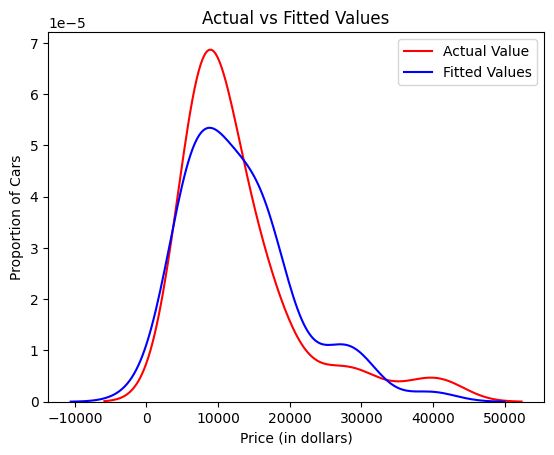

In [32]:
pipe=Pipeline([('ss',StandardScaler()),('lr',LinearRegression())])
pipe.fit(X_train,Y_train)
print("R^2 on training data",pipe.score(X_train,Y_train))
print("R^2 on testing data",pipe.score(X_test,Y_test))
predicted=pipe.predict(X_test)
plot_dis(Y_test,predicted)

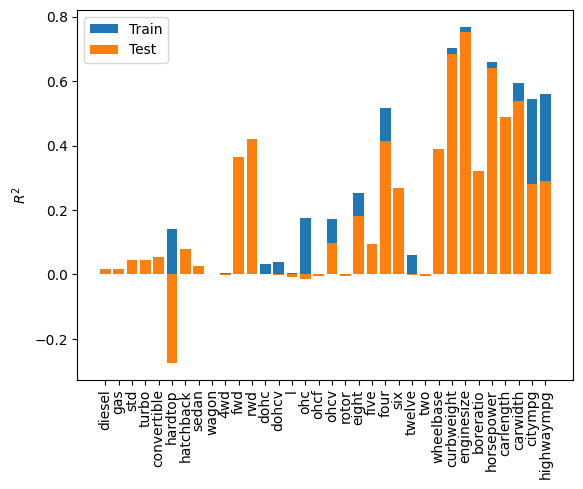

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [34]:
pipe=Pipeline([('ss',StandardScaler()),('lr',LinearRegression())])
get_R2_features(pipe)

In [35]:
poly_features =PolynomialFeatures(degree=2,include_bias=False)

In [36]:
X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.fit_transform(X_test)

In [37]:
print(X_train_poly.shape)

(143, 665)


In [39]:
print(X_test_poly.shape)

(62, 665)


In [40]:
LR=LinearRegression()
LR.fit(X_train_poly,Y_train)

LinearRegression()

In [41]:
predicted=LR.predict(X_train_poly)

In [42]:
print("R^2 on training data: ",LR.score(X_train_poly,Y_train))
print("R^2 on testing data : ",LR.score(X_test_poly,Y_test))

R^2 on training data:  0.9985318497975861
R^2 on testing data :  -36729.957800758064


In [43]:
Input=[('polynomial',PolynomialFeatures(include_bias=False,degree=2)),('model',LinearRegression())]

In [44]:
pipe=Pipeline(Input)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
print("R^2 on training data :",pipe.score(X_train,Y_train))
print("R^2 on testing data:",pipe.score(X_test,Y_test))

R^2 on training data : 0.9985318497975861
R^2 on testing data: -36729.957800758064


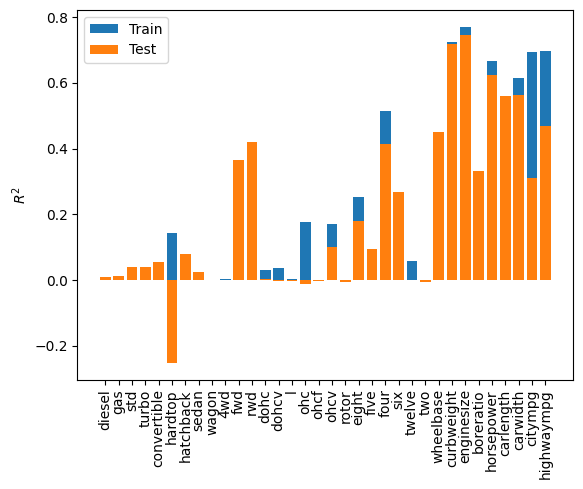

Training R^2 mean value 0.2306865256222299 Testing R^2 mean value 0.194039329276013 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614307 


In [46]:
get_R2_features(pipe)

In [48]:
Input=[('polynomial',PolynomialFeatures(include_bias=False,degree=2)),('model',LinearRegression())]
pipe=Pipeline(Input)

In [56]:
param_grid={
    "polynomial__degree":[1, 2, 3]
}

In [57]:
search=GridSearchCV(pipe,param_grid,n_jobs=1)

In [58]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [59]:
search.fit(X_test,Y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

In [60]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression())])

In [61]:
best.score(X_test,Y_test)

0.9678732814679466

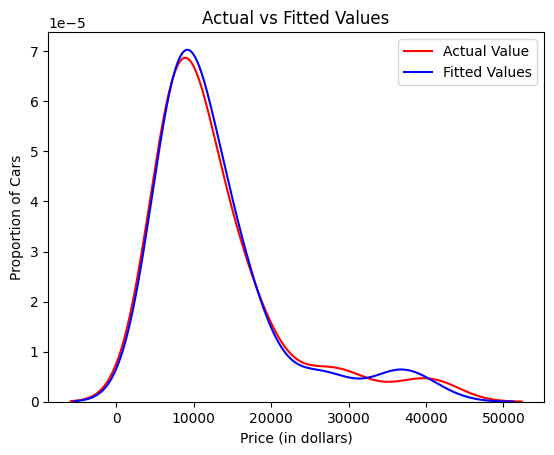

In [62]:
predicted=best.predict(X_test)
plot_dis(Y_test,predicted)

In [66]:
features=list(X)
R_2_train=[]
R_2_test=[]

for feature in features :
    param_grid={
        "polynomial__degree":[1, 2,3,4,5],
        "model__positive":[True,False]}
    Input=[('Polynomial',PolynomialFeatures(include_bias=False,degree=2)),('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search=GridSearchCV(pipe,param_grid,n_jobs=2)
    search.fit(X_test[[feature]],Y_test)
    best=search.best_estimator_

    R_2_test.append(best.score(X_test[[feature]],Y_test))
    R_2_train.append(best.score(X_train[[feature]],Y_train))

plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabels("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

diesel


ValueError: Invalid parameter 'polynomial' for estimator Pipeline(steps=[('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())]). Valid parameters are: ['memory', 'steps', 'verbose'].